# Linear Regression (رگرسیون خطی)
### رگرسیون خطی یک روش است که سعی می‌کند یک رابطه خطی بین یک متغیر وابسته و یک متغیر مستقل را با کمینه کردن فاصله‌ها پیدا کند

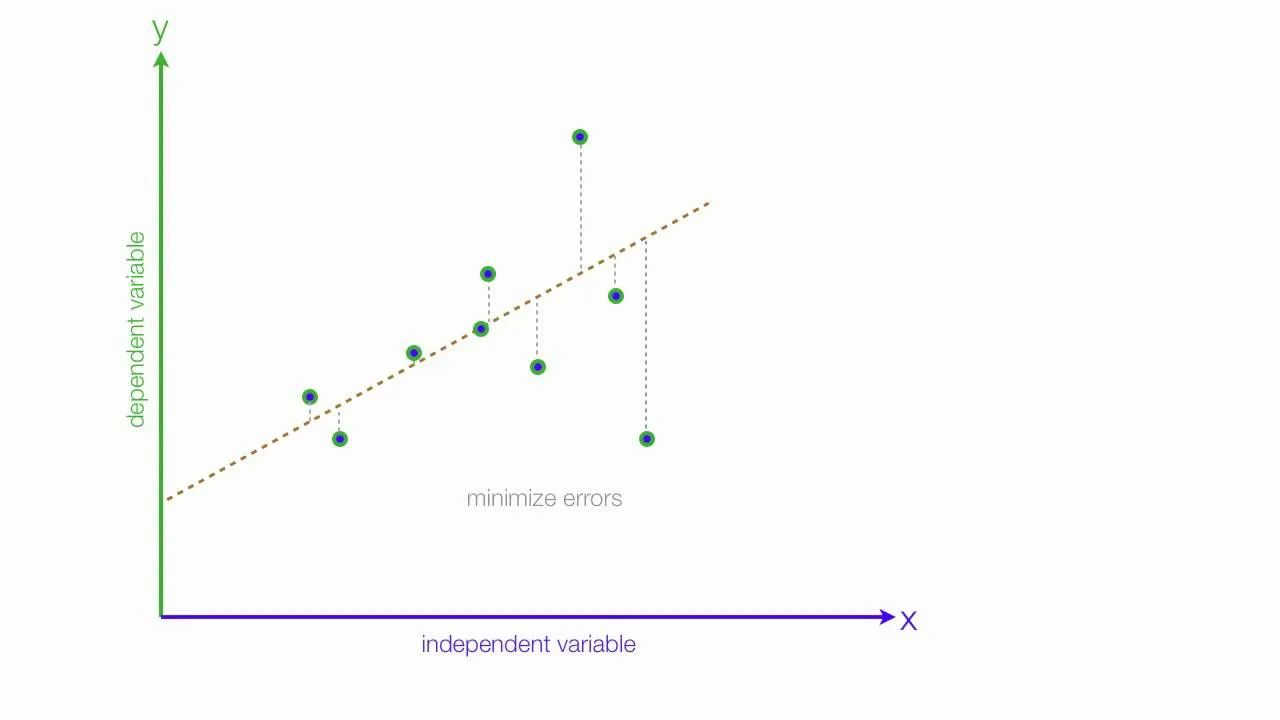

## فرمول رگرسیون خطی   

### y = wx + b

>w = شیب خط

>b = عرض از مبدا


### y = (weight * x) + bias


In [1]:
# !pip install scikit-learn

In [2]:
# !pip install matplotlib

In [3]:
# !pip install numpy

In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, noise=20,random_state=1,n_features=1)

In [7]:
x=torch.from_numpy(X_numpy.astype(np.float32))
x.shape

torch.Size([100, 1])

In [8]:
# x

In [9]:
Y=torch.from_numpy(Y_numpy.astype(np.float32))
Y.shape

torch.Size([100])

In [10]:
# Y

In [11]:
y = Y.view(Y.shape[0] , 1)
print('y: ', y.shape)

y:  torch.Size([100, 1])


In [12]:
# y

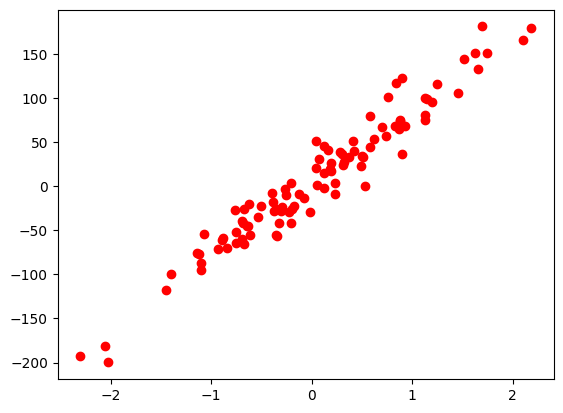

In [21]:
plt.plot(x,y,'ro')
plt.show()

## How to build the model:
##### - model ( forward pass) : input size, output size
##### - loss function
##### - optimizer function
## Training loop
>   - forward pass : compute predicitions and l
>   - backward pass: gradients
>   - update weights
>

In [13]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
    
        super().__init__() # inherits from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        return self.linear(x)

In [14]:
n_sample,n_features = x.shape
print('n_sample:',n_sample)
print('n_features:',n_features)

n_sample: 100
n_features: 1


In [15]:
input_size  = n_features
output_size = n_features
model = LinearRegression(input_size,output_size)
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

---
## فرمول رگرسیون خطی   

### y = wx + b

>w = شیب خط

>b = عرض از مبدا


### y = (weight * x) + bias

In [16]:
params= model.parameters()

In [17]:
# weights, bias
for param in params:
    print(param)

Parameter containing:
tensor([[-0.5344]], requires_grad=True)
Parameter containing:
tensor([-0.8157], requires_grad=True)


In [18]:
learning_rate = 0.01
optimizer=torch.optim.SGD(model.parameters() ,lr=learning_rate)
loss=nn.MSELoss()

In [19]:
n_iters = 250
for epoch in range(n_iters):
#     predictions (forward pass)
    y_predictions=model(x)
#     loss
    l =loss(y,y_predictions)
#    claculate gradiant
    l.backward()
    if epoch % 50  == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1},predict:{y_predictions.detach()[0]}, w:{w[0][0].item()} , grad:{w.grad.item()} , loss:{l}' )
#   run optimizer and update weights
    optimizer.step()
#    reset gradients
    optimizer.zero_grad()

epoch:1,predict:tensor([-0.4887]), w:-0.5344324111938477 , grad:-131.2903594970703 , loss:5830.56689453125
epoch:51,predict:tensor([-23.1641]), w:44.9930419921875 , grad:-58.987274169921875 , loss:1437.724365234375
epoch:101,predict:tensor([-34.9573]), w:65.49042510986328 , grad:-26.626930236816406 , loss:558.8421630859375
epoch:151,predict:tensor([-40.8692]), w:74.75850677490234 , grad:-12.065129280090332 , loss:379.4529724121094
epoch:201,predict:tensor([-43.7628]), w:78.96371459960938 , grad:-5.483582019805908 , loss:342.356201171875


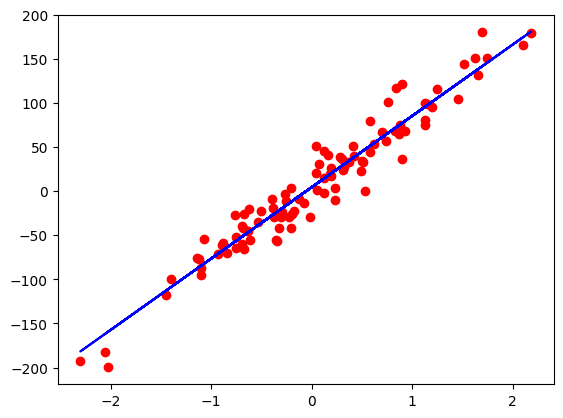

In [22]:
with torch.no_grad():
    predictions=model(x)
plt.plot(x,y,'ro')
plt.plot(x,predictions,'b')
plt.show()